# Tasks

* What is the mean (total) pledge that projects get? (not per backer) *Your answer may vary by +/- 5%

    * $2,245
    
    * $6,750
    
    * $10,981
    
    * $4,980

* Create a histogram that shows the distribution for number of backers.

* What is the skew of the distribution? 

* Is the ‘duration’ variable normally distributed? 
    * Yes
    * No

* If you could collect data on another attribute of these projects, what would it be and why? 


In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from tools.helpers import read_json
import pandas as pd
import numpy as np

In [4]:
in_csv = 'data/input/DSI_kickstarterscrape_dataset.csv'

In [5]:
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))

In [6]:
df = pd.read_csv(in_csv, encoding="ISO-8859-1")
# if need to convert back to utf-8 https://stackoverflow.com/questions/42456867/convert-pandas-dataframe-to-utf8

In [7]:
df.columns

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')

# Mean (total) pledge for projects

In [8]:
for i in df.columns:
    if is_number(df[i].dtype):
        if i == 'pledged':
            print('')
            print('\033[1m{} - mean: {} \033[0m'.format(i, df[i].mean()))
            print('')
        else:
            print('{} - mean {}:'.format(i, df[i].mean()))

project id - mean 1080799735.911439:
goal - mean 11942.709521509238:

pledged - mean: 4980.749678963979 

funded percentage - mean 1.8501285983504365:
backers - mean 69.97319233196248:
levels - mean 8.004939399873795:
updates - mean 4.085079530865809:
comments - mean 8.379528689862262:
duration - mean 39.9955469242988:


# Histogram of distribution for Number of Backers.

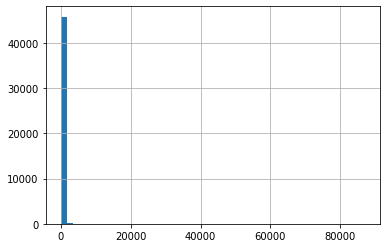

In [9]:
# df.backers.hist(bins='auto')
# https://datascience.stackexchange.com/questions/27116/histogram-plot-with-plt-hist

df.backers.hist(bins=50)

In [12]:
df.backers.describe()

count    45957.000000
mean        69.973192
std        688.628479
min          0.000000
25%          5.000000
50%         23.000000
75%         59.000000
max      87142.000000
Name: backers, dtype: float64

In [14]:
df.backers.sort_values()

29706        0
44903        0
28995        0
20904        0
5799         0
         ...  
17468    24883
11231    36276
42674    61290
10710    68929
41151    87142
Name: backers, Length: 45957, dtype: int64

# Skew of the distribution

In [10]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew

# x = np.linspace( -5, 5, 1000 )
# y = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x)**2  )  # normal distribution

# print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(y) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df.backers) ))

# https://stackoverflow.com/questions/45483890/how-to-correctly-use-scipys-skew-and-kurtosis-functions

skewness of normal distribution (should be 0): 87.47111920387329


In [15]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [19]:
import plotly.express as px
tips = px.data.tips()
fig = px.histogram(df, x="backers")
fig.show()

In [20]:
df.columns

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')

In [21]:
df.location


0           Columbia, MO
1          Maplewood, NJ
2        Los Angeles, CA
3        Los Angeles, CA
4               Novi, MI
              ...       
45952         Austin, TX
45953    Los Angeles, CA
45954    Los Angeles, CA
45955     Vero Beach, FL
45956        Bozeman, MT
Name: location, Length: 45957, dtype: object